<a href="https://www.kaggle.com/code/vijays140291/happiness-index?scriptVersionId=123093246" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading the Dataset

In [2]:
df=pd.read_csv('/kaggle/input/world-happiness-report-2023/WHR2023.csv')
df

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110


# Correlation Matrix

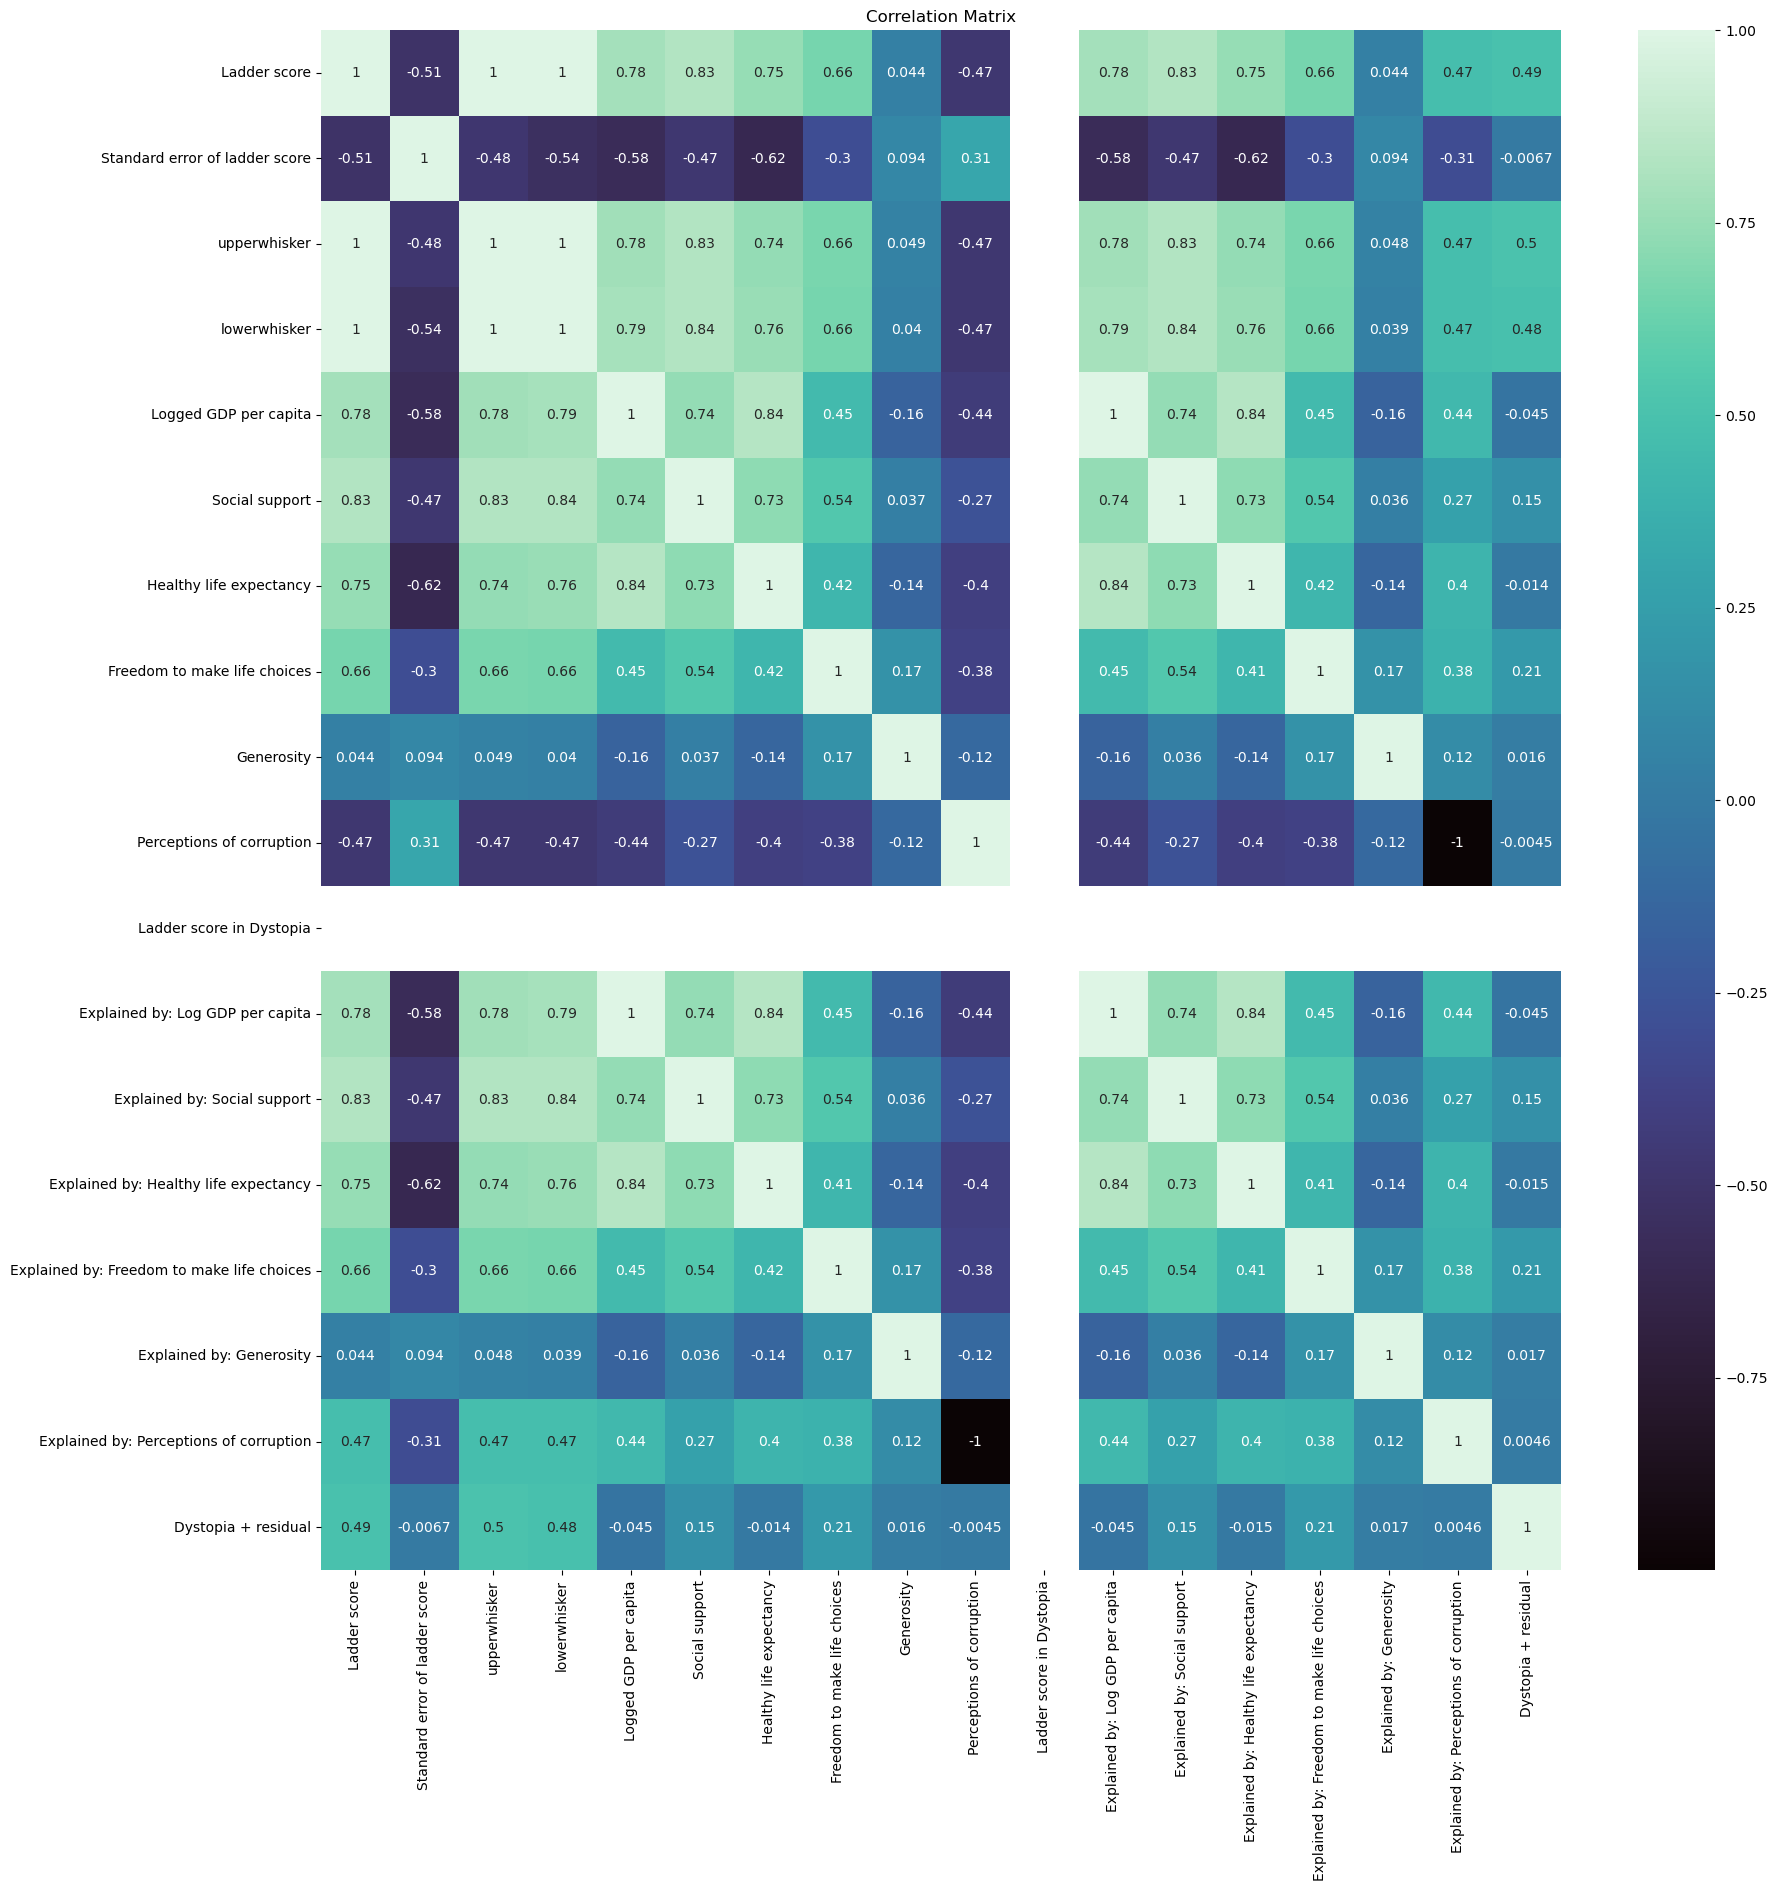

In [5]:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='mako')
plt.title('Correlation Matrix')
plt.show()

In [23]:

for column in df.columns[1:]:
    fig = px.bar(df, x='Country name', y=column,color=column)
    fig.update_layout(title_text=column)
    fig.show()

In [35]:
import plotly.graph_objects as go

# Define your data
country_names = df['Country name']
values = df['Ladder score']

# Create the Choropleth Map with custom hover text
fig = go.Figure(go.Choropleth(
    locations = country_names,
    z = values,
    locationmode = 'country names',
    colorscale = 'Reds',
    autocolorscale=False,
    marker_line_color='white',
    marker_line_width=0.5,
    colorbar_title = 'Value',
    text = [f"{country}<br>Value: {value}" for country, value in zip(country_names, values)],
))
fig.update_layout(
    width=1200,  # set the width of the figure to 800 pixels
    height=1000,  # set the height of the figure to 600 pixels
)
# Customize the hover mode and hover template
fig.show()

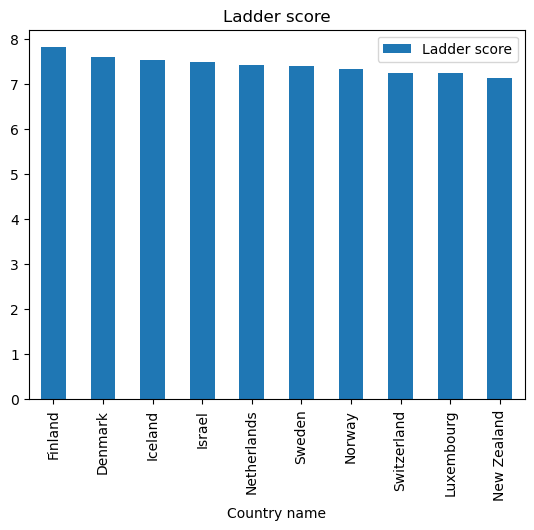

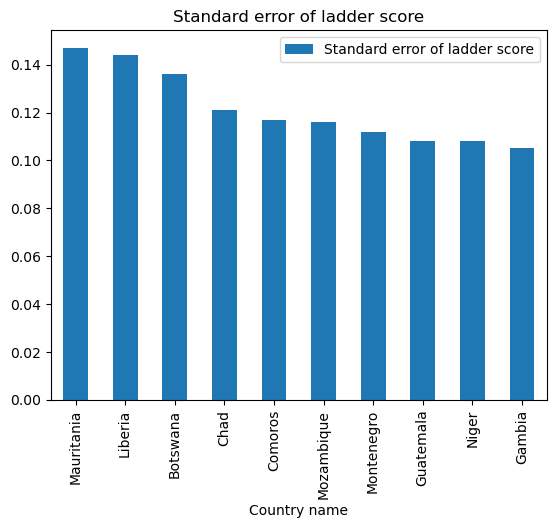

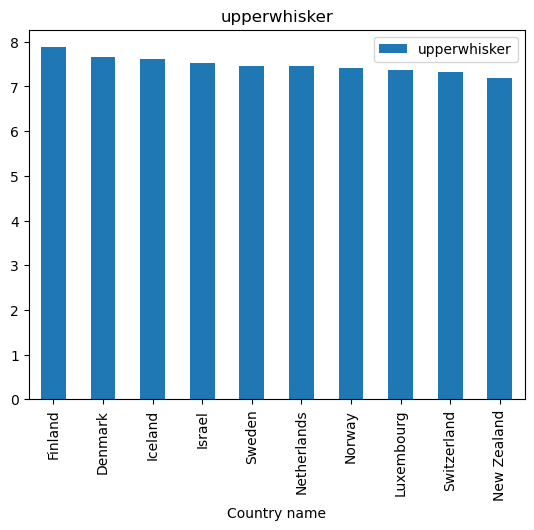

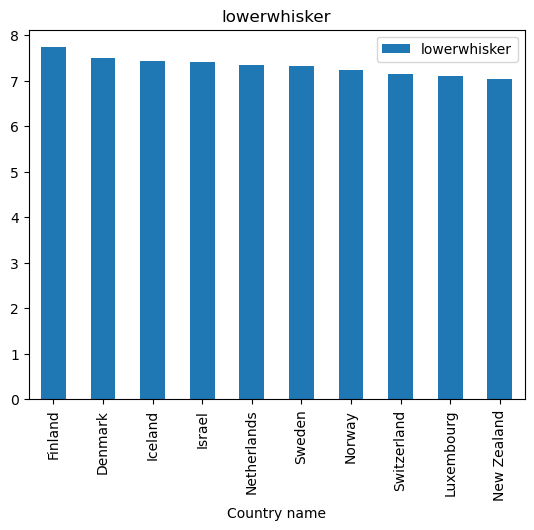

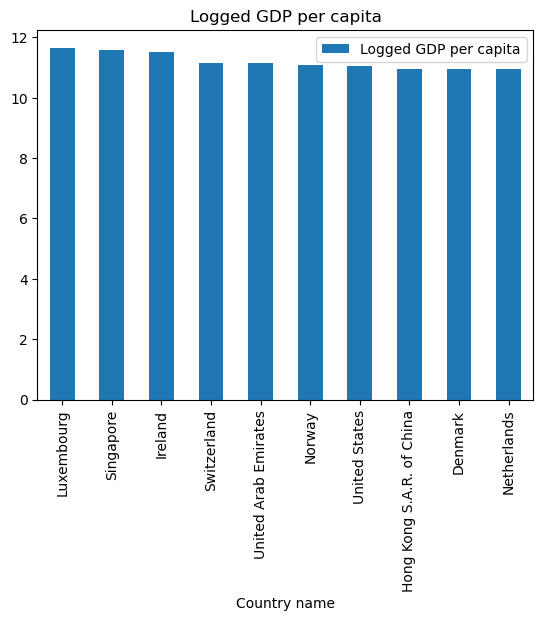

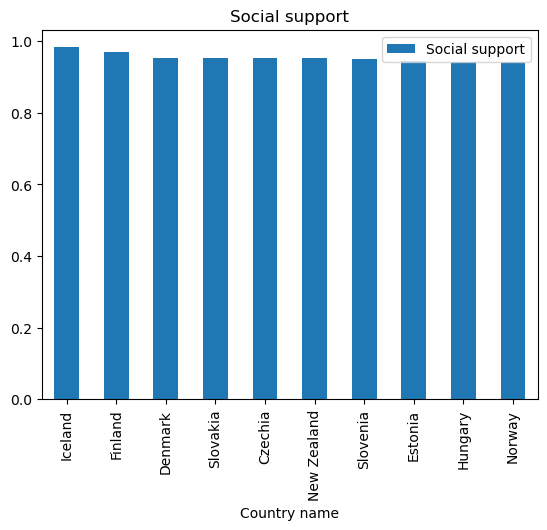

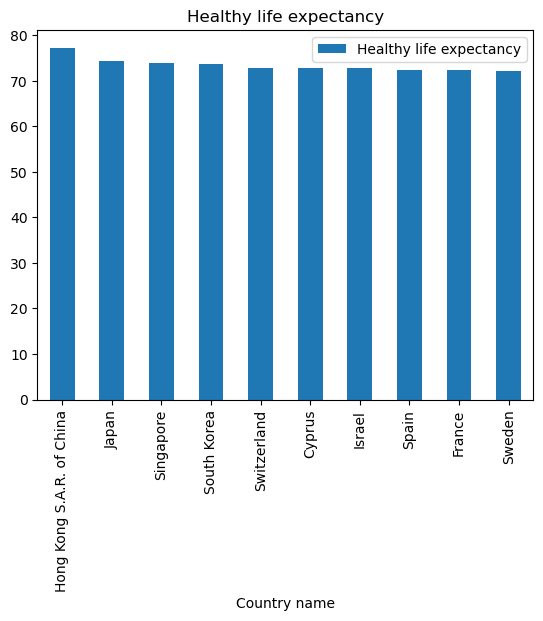

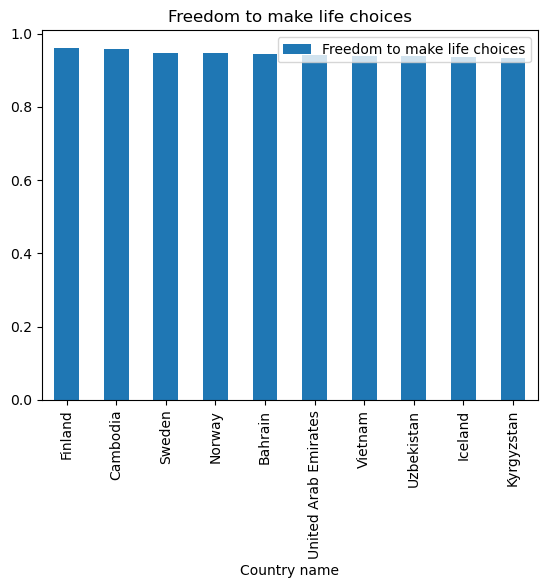

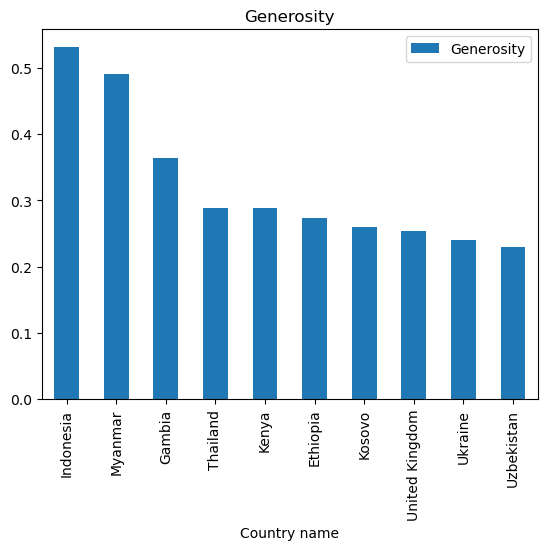

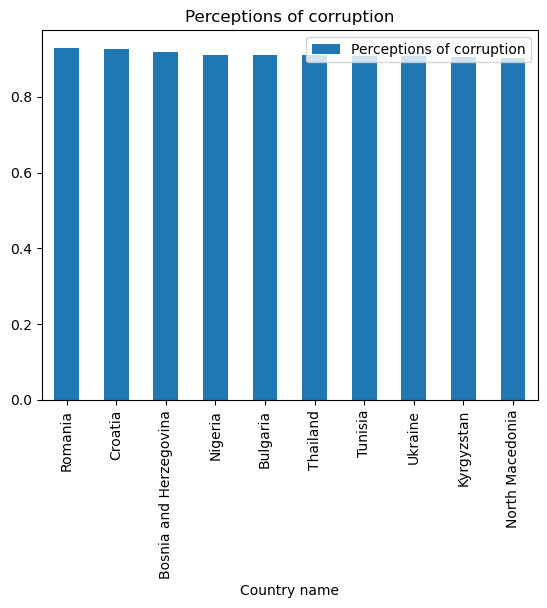

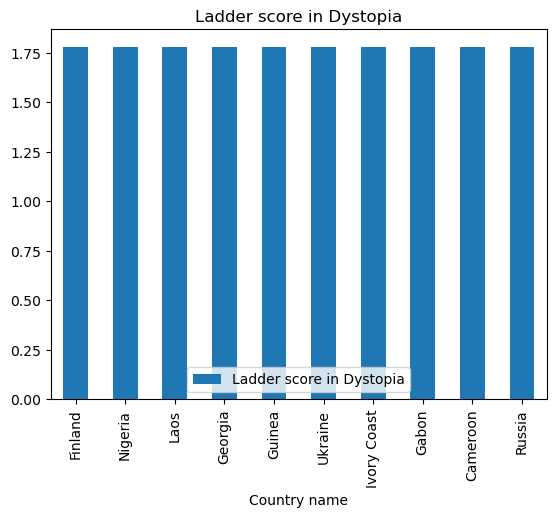

In [71]:
for column in df.columns[1:12]:
    df[['Country name',column]].sort_values(column,ascending=False).head(10).set_index('Country name').plot(kind='bar')
    plt.title(column)